In [7]:
#import the packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
# reading the data
dataset = pd.read_csv('C:\\Users\\Asus\\Downloads\\task 4\\WineQT.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
#shape of datasets
print("shape of our datasets of Red-Wine:{s}".format(s = dataset.shape))
print("Column headers/names: {s}".format(s = list(dataset)))

shape of our datasets of Red-Wine:(1143, 13)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [12]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [13]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [15]:
dataset.quality.value_counts().sort_index()

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

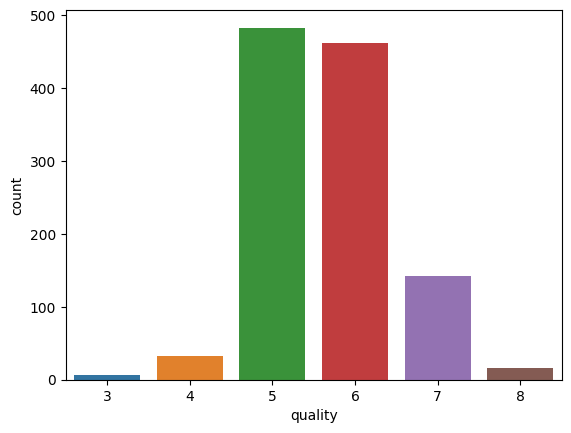

In [16]:
sns.countplot(x='quality', data = dataset)

In [18]:
dataset['alcohol'].describe()

count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [19]:
dataset['sulphates'].describe()

count    1143.000000
mean        0.657708
std         0.170399
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [20]:
dataset['citric acid'].describe()

count    1143.000000
mean        0.268364
std         0.196686
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [21]:
dataset['fixed acidity'].describe()

count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

In [30]:
dataset['residual sugar'].describe()

count    1143.000000
mean        2.532152
std         1.355917
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [ ]:
for col in dataset.columns:
    if dataset[col].isnull().sum()  >0:
        dataset[col] = dataset[col].fillna(dataset[col].mean())
dataset.isnull().sum().sum()

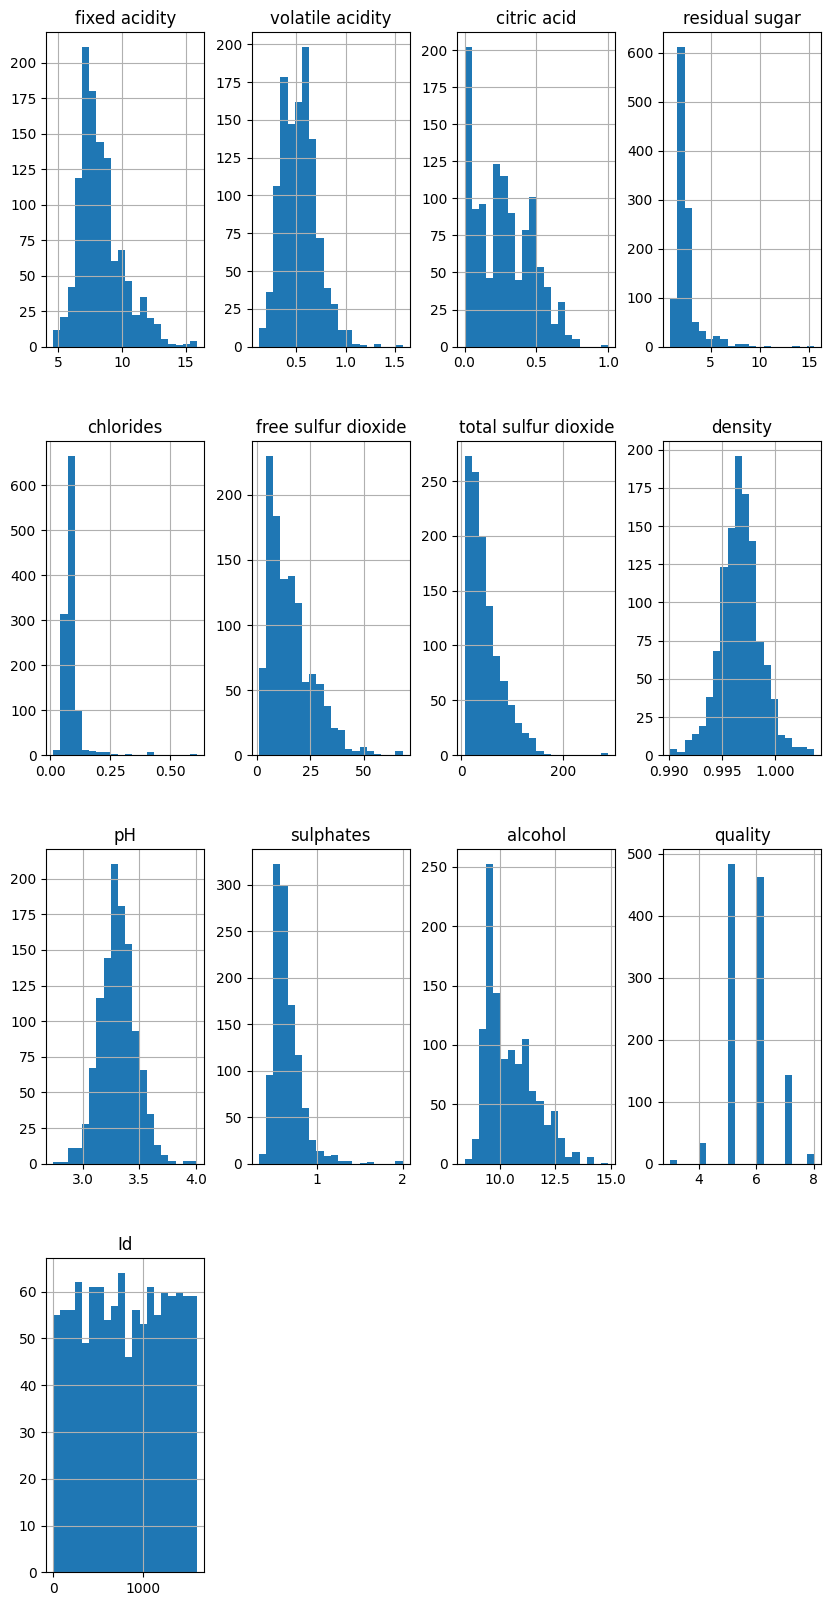

In [31]:
dataset.hist(bins=20 , figsize=(10,20))
plt.show()

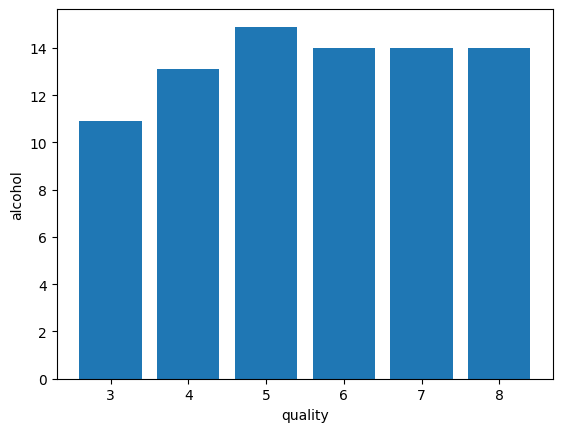

In [32]:
plt.bar(dataset['quality'],dataset['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

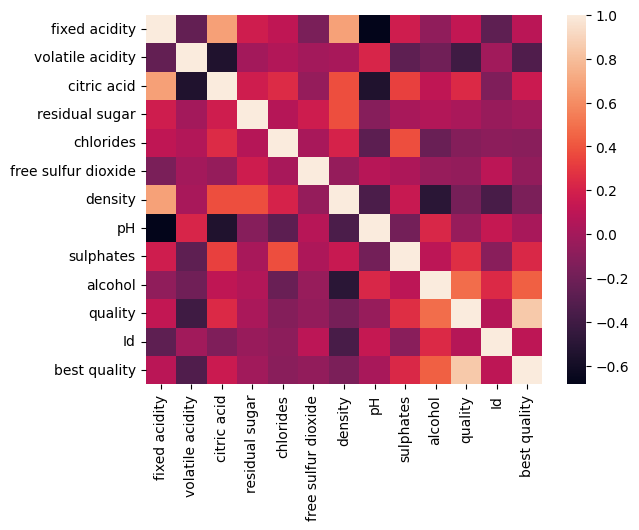

In [47]:
sns.heatmap(dataset.corr())
plt.show()

In [62]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','Id','best quality']

X = dataset[features]  # Features
Y = dataset['quality']  # Target variable


In [55]:
#splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=3)
Y_test.shape

(343,)

In [56]:
#fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [57]:
train_pred = regressor.predict(X_train)
train_pred

array([4.8973565 , 6.05775302, 4.80585314, 5.2237212 , 6.3832381 ,
       4.89932999, 5.08882809, 6.29027411, 6.08435478, 4.64289115,
       6.30768628, 6.39101354, 6.49847948, 5.18658953, 4.68270787,
       4.87368345, 5.0403536 , 4.8879598 , 4.99003442, 4.86797116,
       6.2880103 , 6.08775744, 6.01243447, 6.22127361, 5.02302171,
       4.99854786, 4.75692002, 6.78345836, 4.78101261, 4.82149617,
       5.89457808, 4.87935017, 6.34053597, 6.52092766, 6.5112705 ,
       4.85263101, 6.12750879, 6.4462354 , 5.01062907, 4.82247891,
       4.90153737, 6.21624905, 6.40196476, 4.75237282, 6.36954291,
       4.69323581, 4.94705939, 4.74475205, 4.87258933, 6.16398046,
       6.10964394, 4.75807009, 4.71147502, 6.5273964 , 6.41911003,
       4.90853829, 4.75283344, 4.94720174, 5.00137732, 4.92906419,
       6.26521848, 6.18542756, 5.12636595, 6.38379596, 6.53609071,
       6.45859388, 6.28847658, 6.41686461, 4.90196303, 4.96737046,
       4.78283047, 6.12255085, 6.30530249, 4.92817599, 6.17985

In [58]:
test_pred = regressor.predict(X_test)
test_pred

array([6.2557686 , 5.05009265, 6.32455898, 5.0347921 , 6.57535951,
       6.23144695, 4.81362444, 6.39547531, 4.82306478, 5.20602555,
       6.68724899, 6.26598054, 4.89829132, 5.03600607, 4.85052078,
       6.30665708, 4.89950576, 4.79292955, 6.18119239, 6.52713609,
       4.83782525, 4.81398089, 5.95205675, 6.36181827, 4.78559724,
       6.10696997, 6.20981025, 6.33115443, 4.72179276, 5.01341558,
       6.1444339 , 6.39841573, 4.75874953, 4.87667549, 5.244607  ,
       4.96506041, 4.78292678, 6.33566496, 6.00953066, 6.51900874,
       4.86226337, 4.87013174, 6.49365304, 4.89295923, 5.16551866,
       4.92673222, 5.01764886, 6.50526012, 6.21509935, 6.62247356,
       6.53085837, 6.18109909, 6.19462262, 6.51699704, 4.90767139,
       6.46359022, 4.96903974, 4.91882723, 6.48920152, 6.18281809,
       6.38695633, 6.61869875, 5.03728939, 4.86557239, 6.18759663,
       6.33768708, 4.73017778, 6.04671008, 4.80009192, 4.92679582,
       4.89393737, 6.10039331, 6.08966542, 6.23081708, 6.59167

In [59]:
train_rmse = metrics.mean_squared_error(train_pred,Y_train)**0.5
train_rmse

0.38268199014116444

In [60]:
test_rmse = metrics.mean_squared_error(test_pred,Y_test)**0.5
test_rmse

0.4300861882350259

In [63]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,test_pred))
print('Mean Squared Error:',metrics.mean_squared_error(Y_test,test_pred))
rmse= np.sqrt(metrics.mean_squared_error(Y_test,test_pred))
print('Root Mean Squared Error:',rmse)
from sklearn.metrics import r2_score
r2_score(Y_test,test_pred)

Mean Absolute Error: 0.302249659912338
Mean Squared Error: 0.18497412931053417
Root Mean Squared Error: 0.4300861882350259


0.7348229310645695